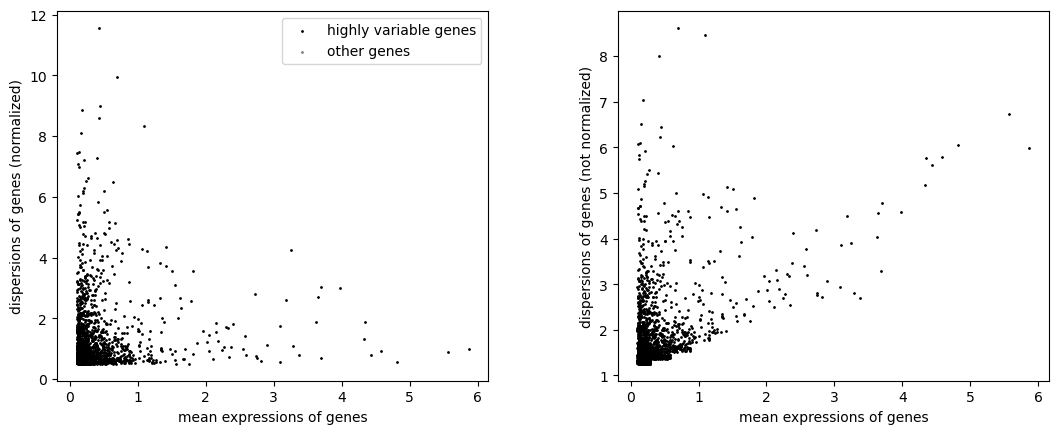

/mnt/iusers01/fatpou01/bmh01/msc-bioinf-2024-2025/z45775ng/.conda/envs/research_project1_env/lib/python3.13/site-packages/scanpy/tools/_utils.py:41: UserWarning: You’re trying to run this on 1625 dimensions of `.X`, if you really want this, set `use_rep='X'`.
         Falling back to preprocessing with `sc.pp.pca` and default params.
  warnings.warn(
/mnt/iusers01/fatpou01/bmh01/msc-bioinf-2024-2025/z45775ng/.conda/envs/research_project1_env/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
import scanpy as sc
import matplotlib.pyplot as plt

# Load the merged .h5ad file in backed mode
adata = sc.read_h5ad(
    "/mnt/bmh01-rds/Eckersley_Lab/MatissOzols/skin_scrna_results/handover/merged_h5ad/4.outlier_filtered_adata.h5ad", 
    backed='r'  # Read-only mode to avoid loading the entire file into memory
)

# Convert backed mode data to in-memory for selected key steps
adata = adata.to_memory()

# Preprocessing steps
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

# Identify highly variable genes
sc.pp.highly_variable_genes(adata, min_mean=0.1, max_mean=10, min_disp=0.5)
adata = adata[:, adata.var['highly_variable']]

# Plot highly variable genes
sc.pl.highly_variable_genes(adata, show=True)

# Perform UMAP visualization
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata)
sc.pl.umap(adata, color=['donor_age_group', 'donor_age'], title='UMAP Visualization by Age Group')

print("Analysis completed successfully.")